#### Disclaimer: Homework made up for educational purposes
#### This dataset contains information of customers in bank, where you are working as Data Scientist. Through given variables you should predict whether a person makes less than 50K # in a year.
#### Note: You should not use all variables. Define which parameters will be useful for you.
#### Dataset Description:
#### age: continuous.

#### workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without- pay, Never-worked.

#### fnlwgt: continuous.

#### education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

#### education-num: continuous.

#### marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married- spouse-absent, Married-AF-spouse.

#### occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty,

#### Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

#### relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
#### race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
#### sex: Female, Male.
#### capital-gain: continuous.
#### capital-loss: continuous.
#### hours-per-week: continuous.

#### native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc.), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia,  El-Salvador, Trinadad & Tobago, Peru, Hong, Holland-Netherlands.

### Data Understanding

In [1]:
                    import pandas as pd
                    import numpy as np
                    import matplotlib.pyplot as plt
                    import seaborn as sns

                    from warnings import filterwarnings
                    filterwarnings('ignore')

                    pd.options.display.max_columns=1000
                    pd.options.display.max_rows=1000

In [2]:
data = pd.read_csv(r'C:\Users\dell\Desktop\Python\week5\income_evaluation.csv')
df = data.copy()
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.columns=df.columns.str.replace(r'[-]', '_', regex=True).str.replace(' ', '')
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [4]:
df.income.unique()

array([' <=50K', ' >50K'], dtype=object)

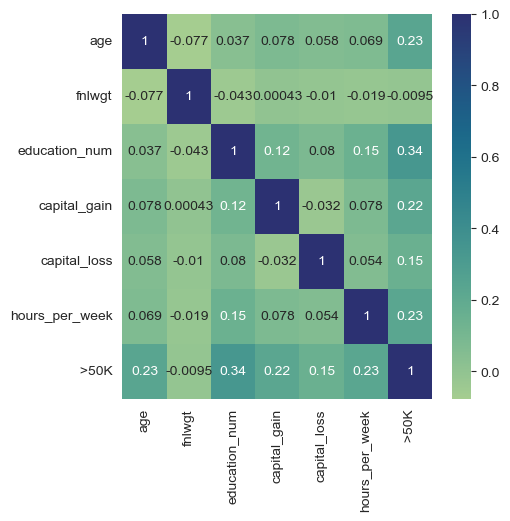

In [65]:
df_test = pd.concat([df.drop('income', axis=1), pd.get_dummies(df.income, drop_first=True, dtype='int')], axis=1)
df_test
import seaborn as sns
plt.figure(figsize=(5, 5))
sns.heatmap(df_test.corr(numeric_only=True), annot=True, cmap="crest")
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.drop(df.select_dtypes(include='int').columns, axis=1)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [9]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [10]:
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [11]:
df.marital_status.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [12]:
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [13]:
df.relationship.unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

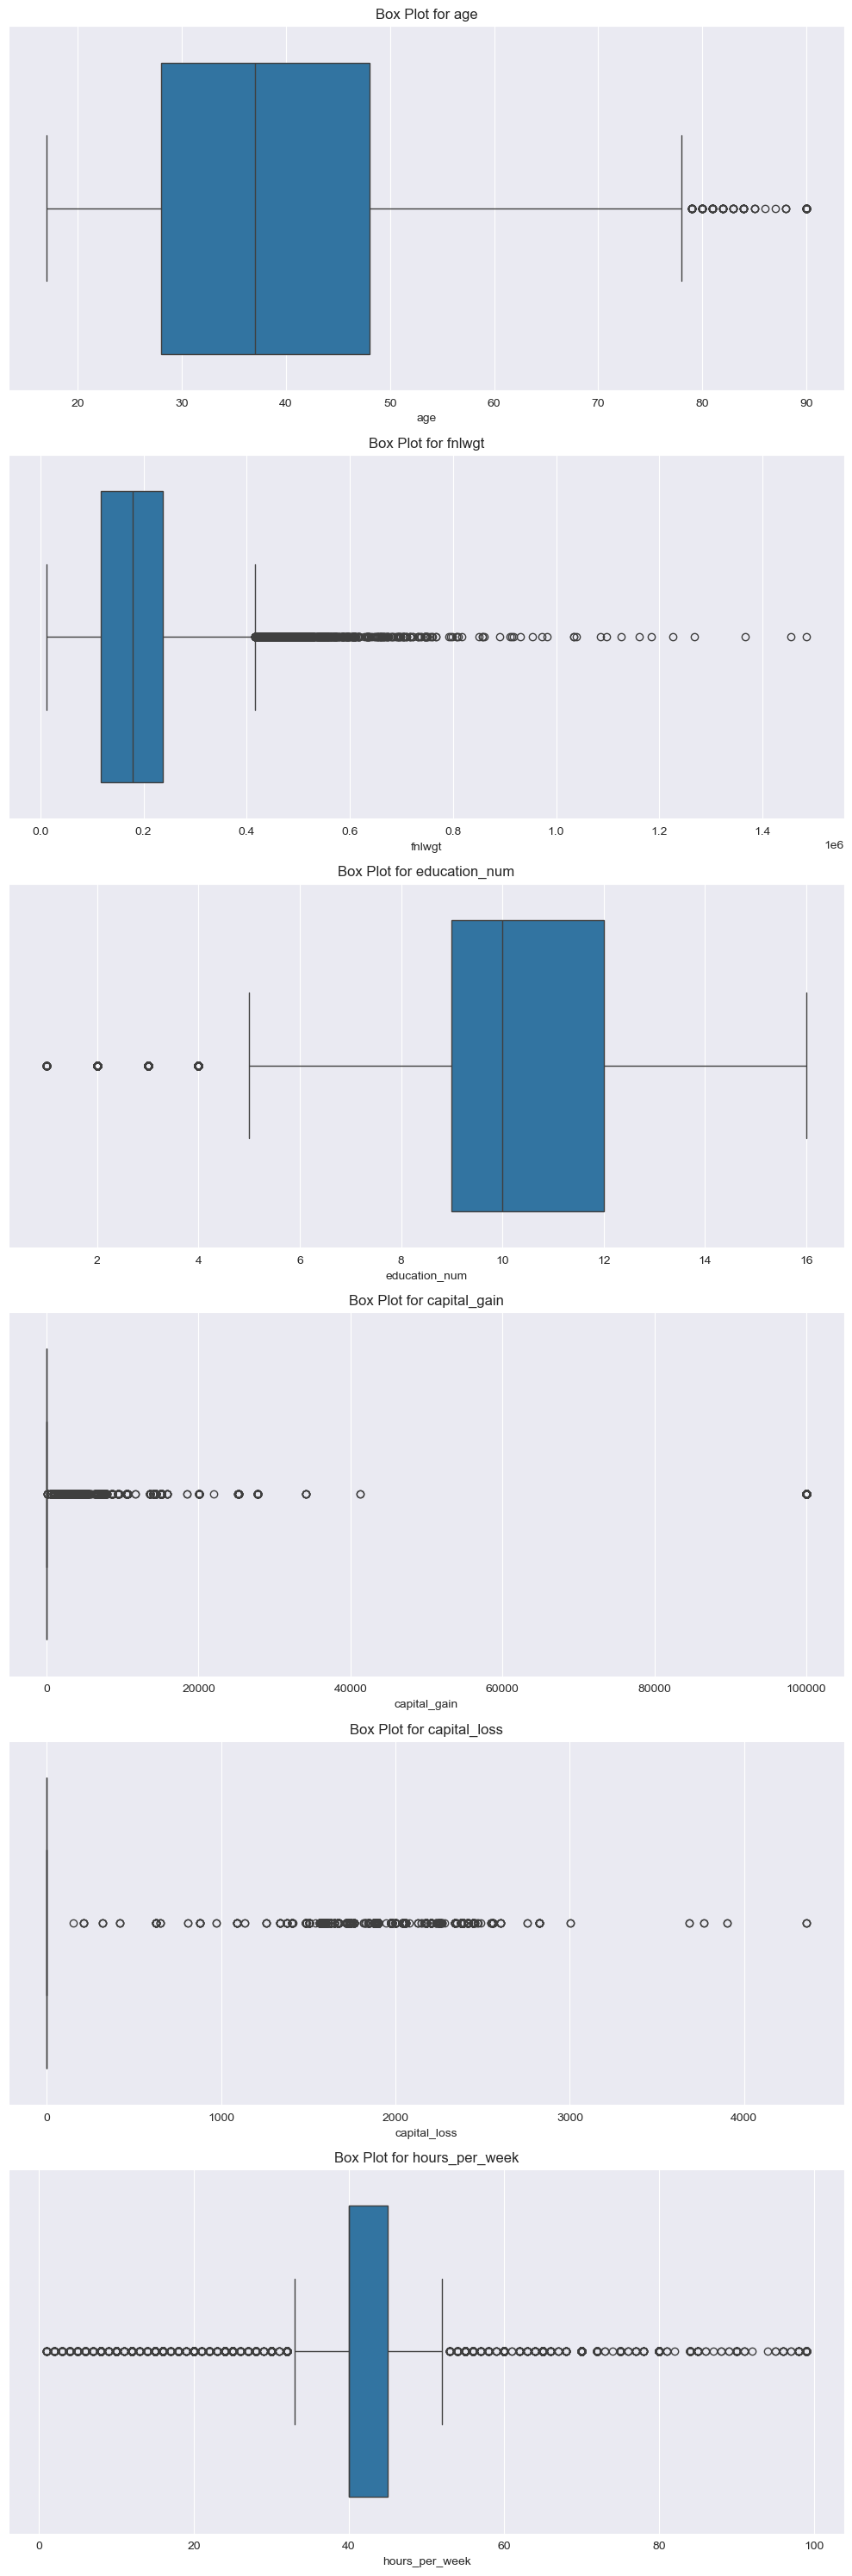

In [14]:
import matplotlib.pyplot as plt
import seaborn as seabornInstance
%matplotlib inline
sns.set_style('darkgrid')

from warnings import filterwarnings
filterwarnings('ignore')

# Rəqəmli (numeric) sütunları seçin
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Qrafiklər üçün sahə yaratmaq
plt.figure(figsize=(10, len(numeric_columns) * 5))

# Hər bir sütun üçün dövr
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')

plt.tight_layout()
plt.show()

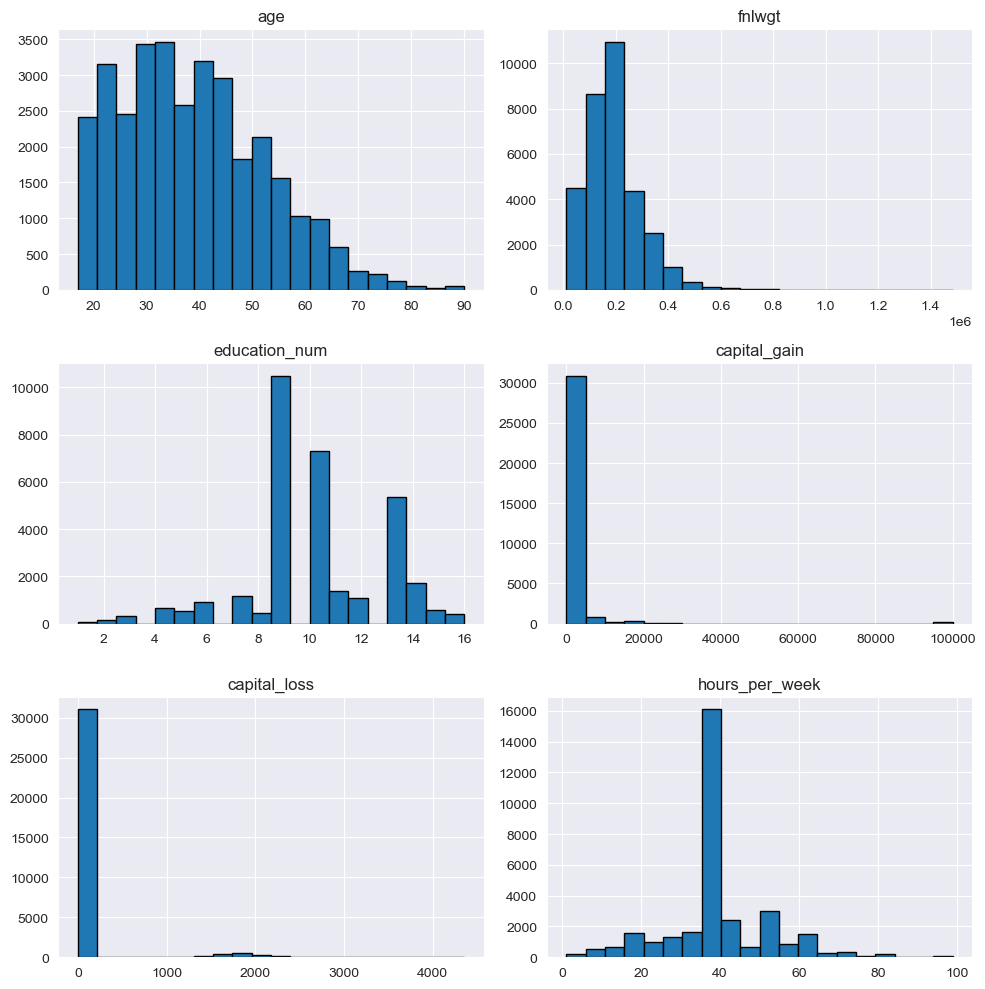

In [15]:
# Bütün sütunların histogramlarını çıxarmaq
import matplotlib.pyplot as plt
df.hist(figsize=(10, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

### Data preparation

In [16]:
df.columns=df.columns.str.replace(r'[-]', '_', regex=True).str.replace(' ', '')
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [17]:
df_1 = df.drop(['fnlwgt', 'native_country'], axis=1)

In [18]:
df.workclass.replace(' ?', np.nan)

0                State-gov
1         Self-emp-not-inc
2                  Private
3                  Private
4                  Private
               ...        
32556              Private
32557              Private
32558              Private
32559              Private
32560         Self-emp-inc
Name: workclass, Length: 32561, dtype: object

In [19]:
df.workclass = df.workclass.replace(' ?', np.nan)

In [20]:
df.workclass[df.workclass.isna()]

27       NaN
61       NaN
69       NaN
77       NaN
106      NaN
        ... 
32530    NaN
32531    NaN
32539    NaN
32541    NaN
32542    NaN
Name: workclass, Length: 1836, dtype: object

In [21]:
df_1

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,<=50K


In [22]:
df_1 = pd.get_dummies(df_1, drop_first=True, dtype='int')

In [23]:
df_1

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K
0,39,13,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
1,50,13,0,0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,38,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
3,53,7,0,0,40,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,28,13,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,38,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
32557,40,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
32558,58,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
32559,22,9,0,0,20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0


In [24]:
df.drop(df.select_dtypes(exclude='int').columns, axis=1)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


### Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
y = df_1['income_ >50K']
X = df_1.drop('income_ >50K', axis=1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26048, 58), (6513, 58), (26048,), (6513,))

### Scalling

In [28]:
from sklearn.preprocessing import StandardScaler, minmax_scale
rc = StandardScaler().fit(X_train)
X_train_scaled = rc.transform(X_train)
X_test_scaled = rc.transform(X_test)

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=42)
logistic_model = classifier.fit(X_train_scaled, y_train)
y_pred_log = logistic_model.predict(X_test_scaled)
y_pred_log

array([0, 0, 1, ..., 1, 0, 0])

In [30]:
y_pred_log_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]
y_pred_log_proba

array([0.02348542, 0.47587054, 0.67078978, ..., 1.        , 0.03305235,
       0.00604921])

In [31]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                    confusion_matrix, classification_report
print('confiion martrix: \n', confusion_matrix(y_test, y_pred_log))
print()
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_log).ravel()
print(f'tn: {tn}, fp: {fp}, fn: {fn}, tp: {tp}')
print()
print('accuracy_score', accuracy_score(y_test, y_pred_log))
print('roc auc score: ', roc_auc_score(y_test, y_pred_log))
print('recall score: ', recall_score(y_test, y_pred_log))
print('precesion score: ', precision_score(y_test, y_pred_log))
print('f1 score: ', f1_score(y_test, y_pred_log))
print()
print('classification report:\n\n', classification_report(y_test, y_pred_log))

confiion martrix: 
 [[4619  323]
 [ 612  959]]

tn: 4619, fp: 323, fn: 612, tp: 959

accuracy_score 0.8564409642253954
roc auc score:  0.7725405280502717
recall score:  0.6104392106938256
precesion score:  0.7480499219968799
f1 score:  0.6722747984577637

classification report:

               precision    recall  f1-score   support

           0       0.88      0.93      0.91      4942
           1       0.75      0.61      0.67      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513



In [32]:
from sklearn.model_selection import cross_validate
accuracies = cross_validate(estimator=logistic_model, X=X_train_scaled, y=y_train, cv=4, scoring = ['f1', 'roc_auc', 
                                                                                             'recall', 'precision', 
                                                                                              'accuracy'])
for key, value in accuracies.items():
    print(key, value.mean())

fit_time 0.6990054845809937
score_time 0.07480329275131226
test_f1 0.6555820766143662
test_roc_auc 0.9060393278343646
test_recall 0.5968106750517693
test_precision 0.7272342264423622
test_accuracy 0.8490479115479116


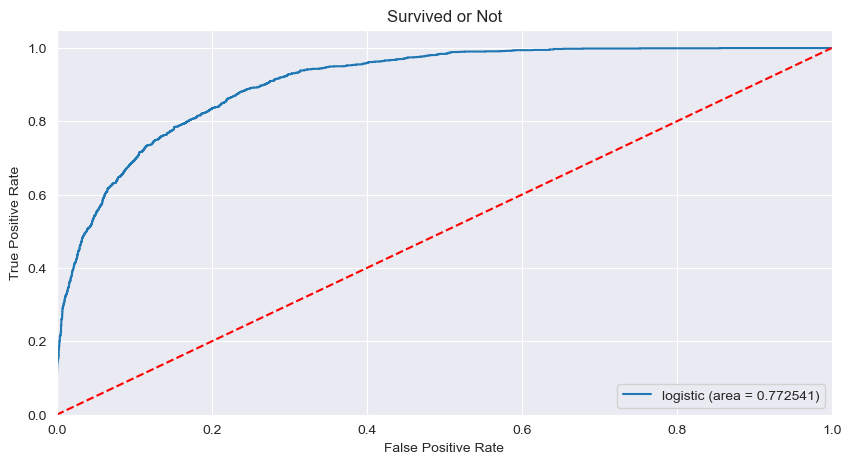

In [33]:
import matplotlib.pyplot as plt
import seaborn as seabornInstance
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logistic_roc_auc = roc_auc_score(y_test, logistic_model.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='logistic (area = %02f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.show()

In [34]:
confusion_matrix(y_test, y_pred_log).ravel()

array([4619,  323,  612,  959], dtype=int64)

In [35]:
confusion_matrix(y_test, y_pred_log).reshape(-1)

array([4619,  323,  612,  959], dtype=int64)

### datanin train uzerinden score-lara baxaq

In [36]:
y_pred_train_logistic = logistic_model.predict(X_train_scaled)
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                    confusion_matrix, classification_report
print('confiion martrix: \n', confusion_matrix(y_train, y_pred_train_logistic))
print()
tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train_logistic).ravel()
print(f'tn: {tn}, fp: {fp}, fn: {fn}, tp: {tp}')
print()
print('accuracy_score', accuracy_score(y_train, y_pred_train_logistic))
print('roc auc score: ', roc_auc_score(y_train, y_pred_train_logistic))
print('recall score: ', recall_score(y_train, y_pred_train_logistic))
print('precesion score: ', precision_score(y_train, y_pred_train_logistic))
print('f1 score: ', f1_score(y_train, y_pred_train_logistic))
print()
print('classification report:\n\n', classification_report(y_train, y_pred_train_logistic))

confiion martrix: 
 [[18386  1392]
 [ 2525  3745]]

tn: 18386, fp: 1392, fn: 2525, tp: 3745

accuracy_score 0.8496237714987716
roc auc score:  0.7634537222822452
recall score:  0.5972886762360446
precesion score:  0.7290247226007397
f1 score:  0.656614359603752

classification report:

               precision    recall  f1-score   support

           0       0.88      0.93      0.90     19778
           1       0.73      0.60      0.66      6270

    accuracy                           0.85     26048
   macro avg       0.80      0.76      0.78     26048
weighted avg       0.84      0.85      0.84     26048



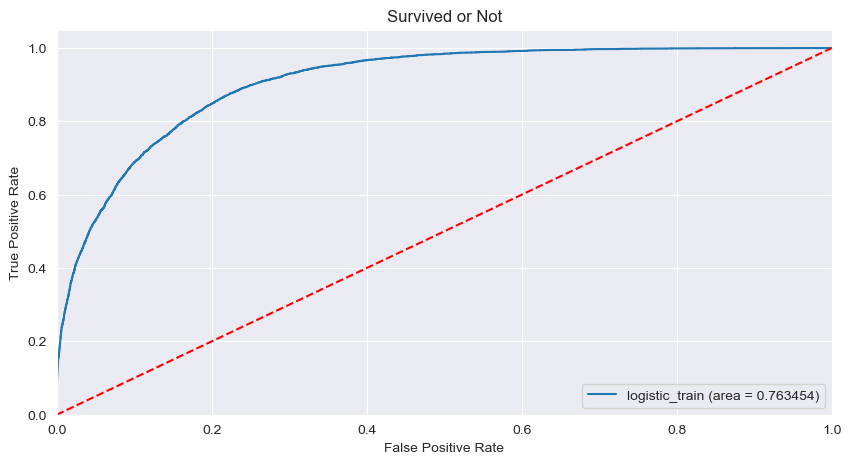

In [37]:
import matplotlib.pyplot as plt
import seaborn as seabornInstance
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logistic_train_roc_auc = roc_auc_score(y_train, logistic_model.predict(X_train_scaled))
fpr, tpr, thresholds = roc_curve(y_train, logistic_model.predict_proba(X_train_scaled)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='logistic_train (area = %02f)' % Logistic_train_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.show()

### KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
KNN_model = classifier.fit(X_train_scaled, y_train)
y_pred_KNN = KNN_model.predict(X_test_scaled)
y_pred_KNN

array([0, 1, 1, ..., 1, 0, 0])

In [39]:
y_pred_KNN_proba = KNN_model.predict_proba(X_test_scaled)[:, 1]
y_pred_KNN_proba

array([0.        , 0.85714286, 1.        , ..., 1.        , 0.        ,
       0.        ])

In [40]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                    confusion_matrix, classification_report
print('confiion martrix: \n', confusion_matrix(y_test, y_pred_KNN))
print()
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_KNN).ravel()
print(f'tn: {tn}, fp: {fp}, fn: {fn}, tp: {tp}')
print()
print('accuracy_score', accuracy_score(y_test, y_pred_KNN))
print('roc auc score: ', roc_auc_score(y_test, y_pred_KNN))
print('recall score: ', recall_score(y_test, y_pred_KNN))
print('precesion score: ', precision_score(y_test, y_pred_KNN))
print('f1 score: ', f1_score(y_test, y_pred_KNN))
print()
print('classification report:\n\n', classification_report(y_test, y_pred_KNN))

confiion martrix: 
 [[4506  436]
 [ 658  913]]

tn: 4506, fp: 436, fn: 658, tp: 913

accuracy_score 0.8320282511899278
roc auc score:  0.7464675532162905
recall score:  0.5811584977721197
precesion score:  0.6767976278724982
f1 score:  0.6253424657534248

classification report:

               precision    recall  f1-score   support

           0       0.87      0.91      0.89      4942
           1       0.68      0.58      0.63      1571

    accuracy                           0.83      6513
   macro avg       0.77      0.75      0.76      6513
weighted avg       0.83      0.83      0.83      6513



In [41]:
from sklearn.model_selection import cross_validate
accuracies = cross_validate(estimator=logistic_model, X=X_train_scaled, y=y_train, cv=4, scoring = ['f1', 'roc_auc', 
                                                                                             'recall', 'precision', 
                                                                                              'accuracy'])
for key, value in accuracies.items():
    print(key, value.mean())

fit_time 0.6522196531295776
score_time 0.059535443782806396
test_f1 0.6555820766143662
test_roc_auc 0.9060393278343646
test_recall 0.5968106750517693
test_precision 0.7272342264423622
test_accuracy 0.8490479115479116


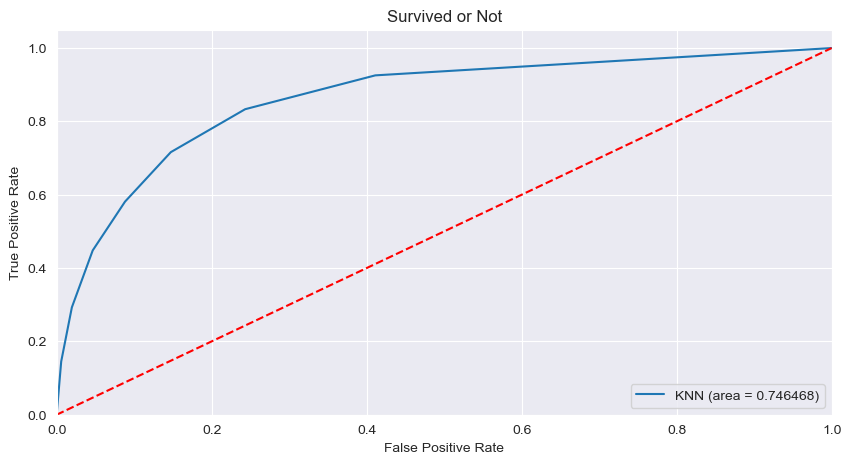

In [42]:
import matplotlib.pyplot as plt
import seaborn as seabornInstance
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
KNN_roc_auc = roc_auc_score(y_test, KNN_model.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, KNN_model.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='KNN (area = %02f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.show()

### Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
NB_model = classifier.fit(X_train_scaled, y_train)
y_pred_NB = NB_model.predict(X_test_scaled)
y_pred_NB

array([1, 1, 1, ..., 1, 1, 1])

In [44]:
import numpy as np
np.set_printoptions(precision=4, suppress=True) 
y_pred_NB_proba = NB_model.predict_proba(X_test_scaled)[:, 1]
y_pred_NB_proba

array([1.    , 1.    , 1.    , ..., 1.    , 1.    , 0.9996])

In [45]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                    confusion_matrix, classification_report
print('confiion martrix: \n', confusion_matrix(y_test, y_pred_NB))
print()
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_NB).ravel()
print(f'tn: {tn}, fp: {fp}, fn: {fn}, tp: {tp}')
print()
print('accuracy_score', accuracy_score(y_test, y_pred_NB))
print('roc auc score: ', roc_auc_score(y_test, y_pred_NB))
print('recall score: ', recall_score(y_test, y_pred_NB))
print('precesion score: ', precision_score(y_test, y_pred_NB))
print('f1 score: ', f1_score(y_test, y_pred_NB))
print()
print('classification report:\n\n', classification_report(y_test, y_pred_NB))

confiion martrix: 
 [[1935 3007]
 [  55 1516]]

tn: 1935, fp: 3007, fn: 55, tp: 1516

accuracy_score 0.5298633502226316
roc auc score:  0.678266168908801
recall score:  0.9649904519414386
precesion score:  0.33517576829537915
f1 score:  0.497538562520512

classification report:

               precision    recall  f1-score   support

           0       0.97      0.39      0.56      4942
           1       0.34      0.96      0.50      1571

    accuracy                           0.53      6513
   macro avg       0.65      0.68      0.53      6513
weighted avg       0.82      0.53      0.54      6513



In [46]:
from sklearn.model_selection import cross_validate
accuracies = cross_validate(estimator=NB_model, X=X_train_scaled, y=y_train, cv=4, scoring = ['f1', 'roc_auc', 
                                                                                             'recall', 'precision', 
                                                                                              'accuracy'])
for key, value in accuracies.items():
    print(key, value.mean())

fit_time 0.126836895942688
score_time 0.14911317825317383
test_f1 0.4931715206982888
test_roc_auc 0.7534769611443907
test_recall 0.9623601374978836
test_precision 0.33155982180681043
test_accuracy 0.5237638206388207


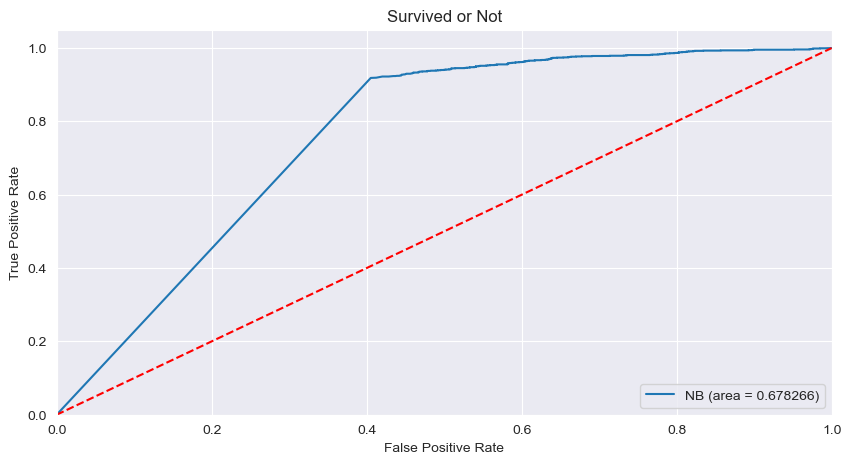

In [47]:
import matplotlib.pyplot as plt
import seaborn as seabornInstance
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
NB_roc_auc = roc_auc_score(y_test, NB_model.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, NB_model.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='NB (area = %02f)' % NB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.show()

### Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
DT_model = classifier.fit(X_train_scaled, y_train)
y_pred_DT = DT_model.predict(X_test_scaled)
y_pred_DT

array([0, 1, 1, ..., 1, 0, 0])

In [49]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                    confusion_matrix, classification_report
print('confiion martrix: \n', confusion_matrix(y_test, y_pred_DT))
print()
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_DT).ravel()
print(f'tn: {tn}, fp: {fp}, fn: {fn}, tp: {tp}')
print()
print('accuracy_score', accuracy_score(y_test, y_pred_DT))
print('roc auc score: ', roc_auc_score(y_test, y_pred_DT))
print('recall score: ', recall_score(y_test, y_pred_DT))
print('precesion score: ', precision_score(y_test, y_pred_DT))
print('f1 score: ', f1_score(y_test, y_pred_DT))
print()
print('classification report:\n\n', classification_report(y_test, y_pred_DT))

confiion martrix: 
 [[4383  559]
 [ 593  978]]

tn: 4383, fp: 559, fn: 593, tp: 978

accuracy_score 0.8231229847996315
roc auc score:  0.75471065892037
recall score:  0.622533418204965
precesion score:  0.6363044892648015
f1 score:  0.6293436293436293

classification report:

               precision    recall  f1-score   support

           0       0.88      0.89      0.88      4942
           1       0.64      0.62      0.63      1571

    accuracy                           0.82      6513
   macro avg       0.76      0.75      0.76      6513
weighted avg       0.82      0.82      0.82      6513



In [50]:
from sklearn.model_selection import cross_validate
accuracies = cross_validate(estimator=DT_model, X=X_train_scaled, y=y_train, cv=4, scoring = ['f1', 'roc_auc', 
                                                                                             'recall', 'precision', 
                                                                                              'accuracy'])
for key, value in accuracies.items():
    print(key, value)

fit_time [0.7664 0.7005 0.6685 0.6004]
score_time [0.0991 0.0811 0.0781 0.0771]
test_f1 [0.6259 0.6345 0.6263 0.6226]
test_roc_auc [0.7706 0.7738 0.7693 0.7629]
test_recall [0.6167 0.6282 0.6139 0.6094]
test_precision [0.6353 0.6409 0.6392 0.6362]
test_accuracy [0.8225 0.8257 0.8237 0.8222]


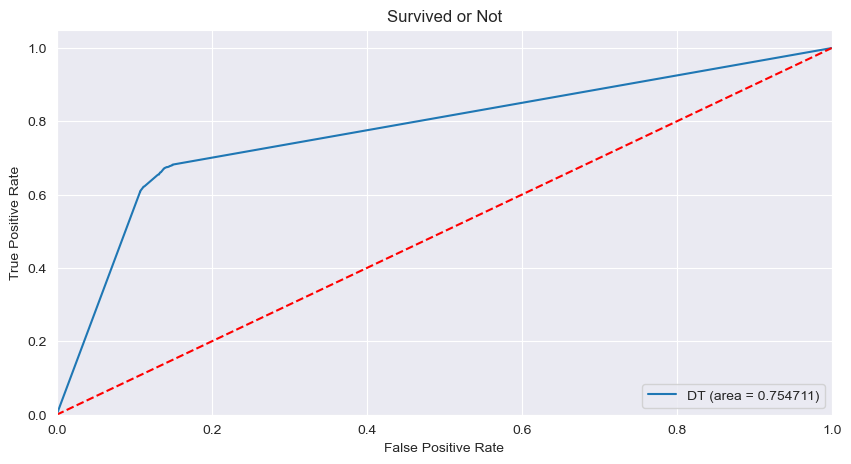

In [51]:
import matplotlib.pyplot as plt
import seaborn as seabornInstance
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
DT_roc_auc = roc_auc_score(y_test, DT_model.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, DT_model.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='DT (area = %02f)' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.show()

### Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=42)
RF_model = classifier.fit(X_train_scaled, y_train)
y_pred_RF = RF_model.predict(X_test_scaled)
y_pred_RF

array([0, 1, 1, ..., 1, 0, 0])

In [53]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                    confusion_matrix, classification_report
print('confiion martrix: \n', confusion_matrix(y_test, y_pred_RF))
print()
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_RF).ravel()
print(f'tn: {tn}, fp: {fp}, fn: {fn}, tp: {tp}')
print()
print('accuracy_score', accuracy_score(y_test, y_pred_RF))
print('roc auc score: ', roc_auc_score(y_test, y_pred_RF))
print('recall score: ', recall_score(y_test, y_pred_RF))
print('precesion score: ', precision_score(y_test, y_pred_RF))
print('f1 score: ', f1_score(y_test, y_pred_RF))
print()
print('classification report:\n\n', classification_report(y_test, y_pred_RF))

confiion martrix: 
 [[4540  402]
 [ 597  974]]

tn: 4540, fp: 402, fn: 597, tp: 974

accuracy_score 0.8466144633809305
roc auc score:  0.7693218418311871
recall score:  0.6199872692552514
precesion score:  0.7078488372093024
f1 score:  0.6610111978283

classification report:

               precision    recall  f1-score   support

           0       0.88      0.92      0.90      4942
           1       0.71      0.62      0.66      1571

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.84      0.85      0.84      6513



In [54]:
from sklearn.model_selection import cross_validate
accuracies = cross_validate(estimator=RF_model, X=X_train_scaled, y=y_train, cv=4, scoring = ['f1', 'roc_auc', 
                                                                                             'recall', 'precision', 
                                                                                              'accuracy'])
for key, value in accuracies.items():
    print(key, value)

fit_time [6.1333 5.2958 6.5066 6.8909]
score_time [0.5544 0.5664 0.7302 1.0347]
test_f1 [0.6446 0.6633 0.6689 0.6676]
test_roc_auc [0.8842 0.8916 0.8921 0.8906]
test_recall [0.6142 0.6212 0.6331 0.6158]
test_precision [0.6782 0.7115 0.7091 0.7289]
test_accuracy [0.8369 0.8481 0.8492 0.8524]


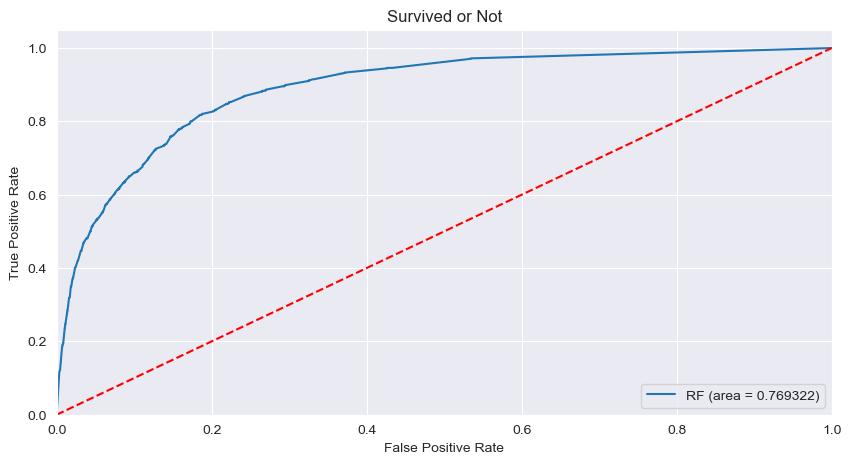

In [55]:
import matplotlib.pyplot as plt
import seaborn as seabornInstance
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
RF_roc_auc = roc_auc_score(y_test, RF_model.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, RF_model.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='RF (area = %02f)' % RF_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.show()

## Multicollinearity

In [77]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [72]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Məlumatları yükləyin
data = df

# Xüsusiyyətləri seçin
X_VIF = data.drop('income', axis=1)

# Sabit sütununu əlavə edin
X_VIF = add_constant(X_VIF)

# VIF dəyərlərini hesablayın
vif = pd.DataFrame()
vif['Feature'] = data.drop('income', axis=1).columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(data.drop('income', axis=1).shape[1])]

print(vif)

           Feature          VIF
0              age     1.718193
1        workclass  1077.970674
2           fnlwgt     1.060131
3        education     1.022045
4    education_num     1.240841
5   marital_status          inf
6       occupation          inf
7     relationship     1.005242
8             race          inf
9              sex          inf
10    capital_gain          inf
11    capital_loss          inf
12  hours_per_week          inf
13  native_country     3.061184


In [76]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Data çərçivəsi yaradılır
data = df.drop('income', axis=1)

# Kateqorial dəyişənlər one-hot encoding ilə numeric formata çevrilir
data_encoded = pd.get_dummies(data, drop_first=True)

# VIF hesablanması üçün dəyişənlərin miqyaslandırılması (opsional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_encoded)

# Hər bir dəyişən üçün VIF dəyərləri hesablanır
vif = pd.DataFrame()
vif['Variable'] = data_encoded.columns
vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

vif



,Variable,VIF
0,age,1.743275
1,fnlwgt,1.061181
2,education_num,inf
3,capital_gain,1.060854
4,capital_loss,1.024377
5,hours_per_week,1.243371
6,workclass_ Local-gov,3.118109
7,workclass_ Never-worked,1.005274
8,workclass_ Private,7.847275
9,workclass_ Self-emp-inc,2.205674


In [78]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Data çərçivəsi yaradılır
data = df.drop(['income'], axis=1)

# Kateqorial dəyişənlər one-hot encoding ilə numeric formata çevrilir
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded = data_encoded.drop('education_num', axis=1)

# VIF hesablanması üçün dəyişənlərin miqyaslandırılması (opsional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_encoded)

# Hər bir dəyişən üçün VIF dəyərləri hesablanır
vif = pd.DataFrame()
vif['Variable'] = data_encoded.columns
vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

vif


,Variable,VIF
0,age,1.743275
1,fnlwgt,1.061181
2,capital_gain,1.060854
3,capital_loss,1.024377
4,hours_per_week,1.243371
5,workclass_ Local-gov,3.118109
6,workclass_ Never-worked,1.005274
7,workclass_ Private,7.847275
8,workclass_ Self-emp-inc,2.205674
9,workclass_ Self-emp-not-inc,3.602617


In [160]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Data çərçivəsi yaradılır
data = df.drop(['income'], axis=1)

# Kateqorial dəyişənlər one-hot encoding ilə numeric formata çevrilir
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded = data_encoded.drop(['education_num', 'marital_status_ Married-civ-spouse'], axis=1)

# VIF hesablanması üçün dəyişənlərin miqyaslandırılması (opsional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_encoded)

# Hər bir dəyişən üçün VIF dəyərləri hesablanır
vif = pd.DataFrame()
vif['Variable'] = data_encoded.columns
vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

vif


,Variable,VIF
0,age,1.739035
1,fnlwgt,1.061165
2,capital_gain,1.060844
3,capital_loss,1.024374
4,hours_per_week,1.243349
5,workclass_ Local-gov,3.118109
6,workclass_ Never-worked,1.005261
7,workclass_ Private,7.847241
8,workclass_ Self-emp-inc,2.205643
9,workclass_ Self-emp-not-inc,3.602466


In [218]:

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Data çərçivəsi yaradılır
data = df.drop(['fnlwgt', 'native_country'], axis=1)

# Kateqorial dəyişənlər one-hot encoding ilə numeric formata çevrilir
data_encoded_ = pd.get_dummies(data, drop_first=True, dtype='int')
data_encoded = data_encoded_.drop(['income_ >50K', 'education_num', 'marital_status_ Married-civ-spouse', 
                                  'race_ White', 'workclass_ Private', 'education_ Bachelors'], axis=1)

data_final = pd.concat([data_encoded, data_encoded_['income_ >50K']], axis=1)

# VIF hesablanması üçün dəyişənlərin miqyaslandırılması (opsional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_encoded)

# Hər bir dəyişən üçün VIF dəyərləri hesablanır
vif = pd.DataFrame()
vif['Variable'] = data_encoded.columns
vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

vif

,Variable,VIF
0,age,1.709280
1,capital_gain,1.059581
2,capital_loss,1.021757
3,hours_per_week,1.238469
4,workclass_ Local-gov,1.158687
5,workclass_ Never-worked,1.004823
6,workclass_ Self-emp-inc,1.086836
7,workclass_ Self-emp-not-inc,1.143972
8,workclass_ State-gov,1.074101
9,workclass_ Without-pay,1.004562


In [219]:
from sklearn.model_selection import train_test_split
y = data_final['income_ >50K']
X = data_final.drop('income_ >50K', axis=1)

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [222]:
from sklearn.preprocessing import StandardScaler, minmax_scale
rc = StandardScaler().fit(X_train)
X_train_scaled = rc.transform(X_train)
X_test_scaled = rc.transform(X_test)

In [223]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=42)
logistic_model = classifier.fit(X_train_scaled, y_train)
y_pred_log = logistic_model.predict(X_test_scaled)
y_pred_log

array([0, 0, 1, ..., 1, 0, 0])

In [224]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                    confusion_matrix, classification_report
print('confiion martrix: \n', confusion_matrix(y_test, y_pred_log))
print()
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_log).ravel()
print(f'tn: {tn}, fp: {fp}, fn: {fn}, tp: {tp}')
print()
print('accuracy_score', accuracy_score(y_test, y_pred_log))
print('roc auc score: ', roc_auc_score(y_test, y_pred_log))
print('recall score: ', recall_score(y_test, y_pred_log))
print('precesion score: ', precision_score(y_test, y_pred_log))
print('f1 score: ', f1_score(y_test, y_pred_log))
print()
print('classification report:\n\n', classification_report(y_test, y_pred_log))

confiion martrix: 
 [[4610  332]
 [ 622  949]]

tn: 4610, fp: 332, fn: 622, tp: 949

accuracy_score 0.8535237217871948
roc auc score:  0.7684472793378365
recall score:  0.6040738383195416
precesion score:  0.7408274785323966
f1 score:  0.6654978962131838

classification report:

               precision    recall  f1-score   support

           0       0.88      0.93      0.91      4942
           1       0.74      0.60      0.67      1571

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513



In [225]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=42)
RF_model = classifier.fit(X_train_scaled, y_train)
y_pred_RF = RF_model.predict(X_test_scaled)
y_pred_RF

array([0, 1, 1, ..., 1, 0, 0])

In [226]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                    confusion_matrix, classification_report
print('confiion martrix: \n', confusion_matrix(y_test, y_pred_RF))
print()
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_RF).ravel()
print(f'tn: {tn}, fp: {fp}, fn: {fn}, tp: {tp}')
print()
print('accuracy_score', accuracy_score(y_test, y_pred_RF))
print('roc auc score: ', roc_auc_score(y_test, y_pred_RF))
print('recall score: ', recall_score(y_test, y_pred_RF))
print('precesion score: ', precision_score(y_test, y_pred_RF))
print('f1 score: ', f1_score(y_test, y_pred_RF))
print()
print('classification report:\n\n', classification_report(y_test, y_pred_RF))

confiion martrix: 
 [[4544  398]
 [ 597  974]]

tn: 4544, fp: 398, fn: 597, tp: 974

accuracy_score 0.8472286196837095
roc auc score:  0.769726536286873
recall score:  0.6199872692552514
precesion score:  0.7099125364431487
f1 score:  0.6619096160380563

classification report:

               precision    recall  f1-score   support

           0       0.88      0.92      0.90      4942
           1       0.71      0.62      0.66      1571

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.84      0.85      0.84      6513



In [227]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
KNN_model = classifier.fit(X_train_scaled, y_train)
y_pred_KNN = KNN_model.predict(X_test_scaled)
y_pred_KNN

array([0, 1, 1, ..., 1, 0, 0])

In [228]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                    confusion_matrix, classification_report
print('confiion martrix: \n', confusion_matrix(y_test, y_pred_KNN))
print()
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_KNN).ravel()
print(f'tn: {tn}, fp: {fp}, fn: {fn}, tp: {tp}')
print()
print('accuracy_score', accuracy_score(y_test, y_pred_KNN))
print('roc auc score: ', roc_auc_score(y_test, y_pred_KNN))
print('recall score: ', recall_score(y_test, y_pred_KNN))
print('precesion score: ', precision_score(y_test, y_pred_KNN))
print('f1 score: ', f1_score(y_test, y_pred_KNN))
print()
print('classification report:\n\n', classification_report(y_test, y_pred_KNN))

confiion martrix: 
 [[4497  445]
 [ 646  925]]

tn: 4497, fp: 445, fn: 646, tp: 925

accuracy_score 0.8324888684170121
roc auc score:  0.7493762141155673
recall score:  0.5887969446212603
precesion score:  0.6751824817518248
f1 score:  0.6290377422645358

classification report:

               precision    recall  f1-score   support

           0       0.87      0.91      0.89      4942
           1       0.68      0.59      0.63      1571

    accuracy                           0.83      6513
   macro avg       0.77      0.75      0.76      6513
weighted avg       0.83      0.83      0.83      6513



In [229]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
NB_model = classifier.fit(X_train_scaled, y_train)
y_pred_NB = NB_model.predict(X_test_scaled)
y_pred_NB

array([1, 1, 1, ..., 1, 1, 1])

In [230]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                    confusion_matrix, classification_report
print('confiion martrix: \n', confusion_matrix(y_test, y_pred_NB))
print()
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_NB).ravel()
print(f'tn: {tn}, fp: {fp}, fn: {fn}, tp: {tp}')
print()
print('accuracy_score', accuracy_score(y_test, y_pred_NB))
print('roc auc score: ', roc_auc_score(y_test, y_pred_NB))
print('recall score: ', recall_score(y_test, y_pred_NB))
print('precesion score: ', precision_score(y_test, y_pred_NB))
print('f1 score: ', f1_score(y_test, y_pred_NB))
print()
print('classification report:\n\n', classification_report(y_test, y_pred_NB))

confiion martrix: 
 [[1898 3044]
 [  54 1517]]

tn: 1898, fp: 3044, fn: 54, tp: 1517

accuracy_score 0.5243359434976201
roc auc score:  0.6748410138124201
recall score:  0.9656269891788669
precesion score:  0.3326024994518746
f1 score:  0.49478147423352903

classification report:

               precision    recall  f1-score   support

           0       0.97      0.38      0.55      4942
           1       0.33      0.97      0.49      1571

    accuracy                           0.52      6513
   macro avg       0.65      0.67      0.52      6513
weighted avg       0.82      0.52      0.54      6513



In [231]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
DT_model = classifier.fit(X_train_scaled, y_train)
y_pred_DT = DT_model.predict(X_test_scaled)
y_pred_DT

array([0, 1, 1, ..., 1, 0, 0])

In [232]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                    confusion_matrix, classification_report
print('confiion martrix: \n', confusion_matrix(y_test, y_pred_DT))
print()
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_DT).ravel()
print(f'tn: {tn}, fp: {fp}, fn: {fn}, tp: {tp}')
print()
print('accuracy_score', accuracy_score(y_test, y_pred_DT))
print('roc auc score: ', roc_auc_score(y_test, y_pred_DT))
print('recall score: ', recall_score(y_test, y_pred_DT))
print('precesion score: ', precision_score(y_test, y_pred_DT))
print('f1 score: ', f1_score(y_test, y_pred_DT))
print()
print('classification report:\n\n', classification_report(y_test, y_pred_DT))

confiion martrix: 
 [[4350  592]
 [ 623  948]]

tn: 4350, fp: 592, fn: 623, tp: 948

accuracy_score 0.8134500230308613
roc auc score:  0.7418238710995351
recall score:  0.6034373010821134
precesion score:  0.6155844155844156
f1 score:  0.609450337512054

classification report:

               precision    recall  f1-score   support

           0       0.87      0.88      0.88      4942
           1       0.62      0.60      0.61      1571

    accuracy                           0.81      6513
   macro avg       0.75      0.74      0.74      6513
weighted avg       0.81      0.81      0.81      6513



In [234]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Data çərçivəsi yaradılır
data = df.drop(['fnlwgt', 'native_country', 'education'], axis=1)

# Kateqorial dəyişənlər one-hot encoding ilə numeric formata çevrilir
data_encoded_ = pd.get_dummies(data, drop_first=True, dtype='int')
data_encoded = data_encoded_.drop(['income_ >50K', 'occupation_ Prof-specialty', 'occupation_ Craft-repair', 
                                'race_ Black' ,'relationship_ Own-child' ,'relationship_ Not-in-family',
                                   'occupation_ Sales', 'race_ White',
                'education_num', 'workclass_ Private', 'marital_status_ Married-civ-spouse'], axis=1)


df_final = pd.concat([data_encoded, data_encoded_['income_ >50K']], axis=1)

# VIF hesablanması üçün dəyişənlərin miqyaslandırılması (opsional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_encoded)

# Hər bir dəyişən üçün VIF dəyərləri hesablanır
vif = pd.DataFrame()
vif['Variable'] = data_encoded.columns
vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

vif

,Variable,VIF
0,age,1.551314
1,capital_gain,1.027317
2,capital_loss,1.014901
3,hours_per_week,1.159906
4,workclass_ Local-gov,1.093159
5,workclass_ Never-worked,1.001072
6,workclass_ Self-emp-inc,1.069474
7,workclass_ Self-emp-not-inc,1.124896
8,workclass_ State-gov,1.032787
9,workclass_ Without-pay,1.003895


In [235]:
from sklearn.model_selection import train_test_split
y = data_final['income_ >50K']
X = data_final.drop('income_ >50K', axis=1)

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [237]:
from sklearn.preprocessing import StandardScaler, minmax_scale
rc = StandardScaler().fit(X_train)
X_train_scaled = rc.transform(X_train)
X_test_scaled = rc.transform(X_test)

In [238]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=42)
logistic_model = classifier.fit(X_train_scaled, y_train)
y_pred_log = logistic_model.predict(X_test_scaled)
y_pred_log

array([0, 0, 1, ..., 1, 0, 0])

In [239]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                    confusion_matrix, classification_report
print('confiion martrix: \n', confusion_matrix(y_test, y_pred_log))
print()
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_log).ravel()
print(f'tn: {tn}, fp: {fp}, fn: {fn}, tp: {tp}')
print()
print('accuracy_score', accuracy_score(y_test, y_pred_log))
print('roc auc score: ', roc_auc_score(y_test, y_pred_log))
print('recall score: ', recall_score(y_test, y_pred_log))
print('precesion score: ', precision_score(y_test, y_pred_log))
print('f1 score: ', f1_score(y_test, y_pred_log))
print()
print('classification report:\n\n', classification_report(y_test, y_pred_log))

confiion martrix: 
 [[4610  332]
 [ 622  949]]

tn: 4610, fp: 332, fn: 622, tp: 949

accuracy_score 0.8535237217871948
roc auc score:  0.7684472793378365
recall score:  0.6040738383195416
precesion score:  0.7408274785323966
f1 score:  0.6654978962131838

classification report:

               precision    recall  f1-score   support

           0       0.88      0.93      0.91      4942
           1       0.74      0.60      0.67      1571

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513

